#  Problem statement 

### To develop a predictive model that can accurately detect the presence of thyroid disease based on a set of clinical and diagnostic features. The model should be able to classify patients.
 * The goal is to assist healthcare professionals in making accurate diagnoses and improving patient outcomes.

#### #There are several reasons why building a machine learning algorithm for predicting thyroid disease can be necessary:

* Early Detection: Machine learning algorithms can help in early detection of thyroid disease by analyzing large amounts of data from various sources, such as electronic health records, medical imaging, and patient history. Early detection can lead to earlier treatment, better outcomes, and improved quality of life.

* Accuracy: Machine learning algorithms can analyze vast amounts of data and detect patterns that may not be visible to human experts. This can lead to more accurate diagnoses and predictions of thyroid disease.

* Personalization: Machine learning algorithms can take into account individual patient characteristics, such as age, gender, and medical history, to personalize predictions and treatment plans for thyroid disease. This can lead to more targeted and effective treatment.

* Efficiency: Machine learning algorithms can automate and streamline the diagnostic and treatment process for thyroid disease, saving time and resources for healthcare providers and patients.

- Overall, building a machine learning algorithm for predicting thyroid disease can lead to better healthcare outcomes, improved patient experiences, and more efficient healthcare delivery.



#  About the dataset

#### The dataset obtained from the University of California Irvine(UCI) machine learning library.
    * The dataset contains 3772 samples, and each sample has 30 attributes.
    * 29 input features and 1 output column — ‘Class’.
    * We will use Classification techniques here, since the predicted output will be a categorcal in naturre.

## Improting the Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

##  Loading the dataset

In [4]:
data=pd.read_csv('hypothyroid.csv')

In [5]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [6]:
data.shape

(3772, 30)

# Features
Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

* age - Age of the person
* sex - Male or Female
* on_thyroxine - true or false
* on_antithyroid_medication - true or false
* sick - true or false
* pregnant - true or false
* thyroid_surgery - true or false
* I131_treatment - true or false
* query_hypothyroid - true or false
* query_hyperthyroid -true or false
* lithium - true or false
* goitre - true or false
* tumor - true or false
* hypopituitary- true or false
* psych - true or false
* TSH_measured - true or false
* TSH thyroid stimulating hormone (floating value)- that ranges between 0.4 to 5.0 milli-International Unit per liter.
* T3_measured - true or false
* T3 - triiodothyronine value that ranges between 100 to 200 nanogram per deciliter of blood.
* TT4_measured- true or false
* Total T4 (TT4) - Thyroxine value ranges from 4.6 to 12 micrograms per deciliter of blood.
* T4U_measured- true or false
* T4U (T4 Uptake) - numerical value 
* FTI_measured- true or false
* FTI (Free Thyroxine Index/Free T4 Index)- ranges between 0.7-1.9 nanogram per decilitre of blood.
* TBG_measured- true or false
* TBG -Thyroid-Binding Globulin  value
* referral_source - different sources of referals
* Class - different types of thyroid


(i) TSH 


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

####  Let's check how many categories are there in each feature

In [8]:
for i in data:
    print(data[i].value_counts(),'\n')

59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: age, Length: 94, dtype: int64 

F    2480
M    1142
?     150
Name: sex, dtype: int64 

f    3308
t     464
Name: on_thyroxine, dtype: int64 

f    3722
t      50
Name: query_on_thyroxine, dtype: int64 

f    3729
t      43
Name: on_antithyroid_medication, dtype: int64 

f    3625
t     147
Name: sick, dtype: int64 

f    3719
t      53
Name: pregnant, dtype: int64 

f    3719
t      53
Name: thyroid_surgery, dtype: int64 

f    3713
t      59
Name: I131_treatment, dtype: int64 

f    3538
t     234
Name: query_hypothyroid, dtype: int64 

f    3535
t     237
Name: query_hyperthyroid, dtype: int64 

f    3754
t      18
Name: lithium, dtype: int64 

f    3738
t      34
Name: goitre, dtype: int64 

f    3676
t      96
Name: tumor, dtype: int64 

f    3771
t       1
Name: hypopituitary, dtype: int64 

f    3588
t     184
Name: psych, dtype: int64 

t    3403
f     369
Name: T

In [9]:
data['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

### Description of the data

In [10]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


We can see from the data description that there are no missing values. But if you check the dataset the missing values are replaced with invalid values like '?'. Let's replace such values with 'nan' and check for missing values again.

In [11]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


So these are the columns which have missing values but missing values are replaced with '?'. We will replace these values with 'nan' and then do imputation of these missing values. 

Also, we can see thatfor column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

In [12]:
data = data.drop(['TBG'],axis =1)

Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

###  Removing the irrelevent features

In [13]:
data[['T4U_measured','T4U']]

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

Let's drop such columns as well.

In [14]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [15]:
# Now let's replace the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [16]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column,':',count)    

age : 0
sex : 0
on_thyroxine : 0
query_on_thyroxine : 0
on_antithyroid_medication : 0
sick : 0
pregnant : 0
thyroid_surgery : 0
I131_treatment : 0
query_hypothyroid : 0
query_hyperthyroid : 0
lithium : 0
goitre : 0
tumor : 0
hypopituitary : 0
psych : 0
TSH : 0
T3 : 0
TT4 : 0
T4U : 0
FTI : 0
referral_source : 0
Class : 0


Great!! Now that we have replaced all such values with 'nan'. Let's deal with these missing values now.

In [17]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques or we can drop.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns.
For columns with more than two categories we will use get dummies.

###  Handling Missing values

In [18]:
data['age'] =data.age.astype('float64')

data['TSH'] =data.TSH.astype('float64')

data['T3'] =data.T3.astype('float64')

data['TT4'] =data.TT4.astype('float64')

data['T4U'] =data.T4U.astype('float64')

data['FTI'] =data.FTI.astype('float64')

In [19]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [20]:
# imp = IterativeImputer(max_iter=20, verbose = 1, random_state=0)

In [21]:
# num_df = data.select_dtypes(exclude='object')
# num_df.head()

In [22]:
# imp.fit(num_df)

In [23]:
# df1 = pd.DataFrame(imp.transform(num_df), columns = num_df.columns)

In [24]:
# df1.shape

In [25]:
## Combining numerical and categorical data after imputing the missing values

In [26]:
# data = pd.concat([df1, data.select_dtypes(include = 'object')], axis= 1)

In [27]:
data.shape

(3772, 23)

In [28]:
data.dropna(inplace=True)

In [29]:
 data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

In [30]:
# data.drop_duplicates(keep='first',inplace=True)

<AxesSubplot:>

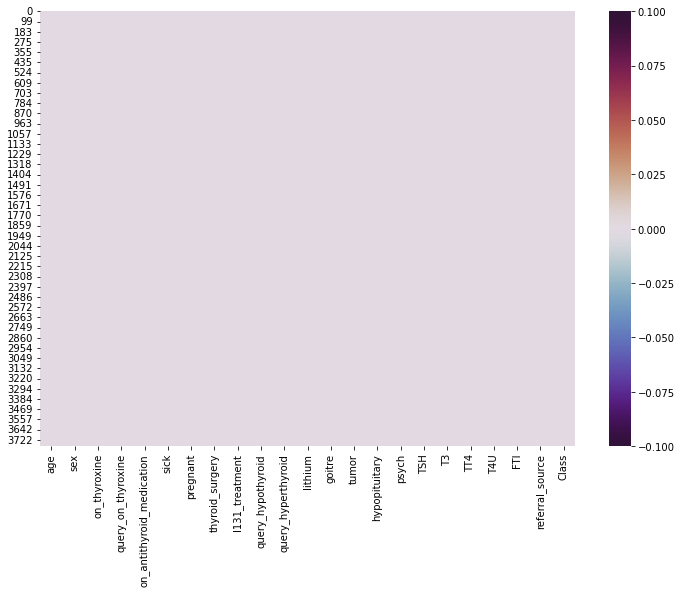

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.isnull(),cmap='twilight_shifted') 

In [32]:
data['age'] =data.age.astype('int64')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int64  
 1   sex                        2643 non-null   object 
 2   on_thyroxine               2643 non-null   object 
 3   query_on_thyroxine         2643 non-null   object 
 4   on_antithyroid_medication  2643 non-null   object 
 5   sick                       2643 non-null   object 
 6   pregnant                   2643 non-null   object 
 7   thyroid_surgery            2643 non-null   object 
 8   I131_treatment             2643 non-null   object 
 9   query_hypothyroid          2643 non-null   object 
 10  query_hyperthyroid         2643 non-null   object 
 11  lithium                    2643 non-null   object 
 12  goitre                     2643 non-null   object 
 13  tumor                      2643 non-null   objec

In [34]:
categorical = data.select_dtypes('O')
categorical

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVHC,negative
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
7,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
8,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,SVI,negative
9,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,compensated_hypothyroid
3768,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
3769,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,other,negative
3770,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative


In [35]:
continuous = data.select_dtypes(include=np.number)
continuous

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
4,70,0.72,1.2,61.0,0.87,70.0
7,80,2.20,0.6,80.0,0.70,115.0
8,66,0.60,2.2,123.0,0.93,132.0
9,68,2.40,1.6,83.0,0.89,93.0
...,...,...,...,...,...,...
3766,19,8.80,2.7,108.0,1.11,97.0
3768,68,1.00,2.1,124.0,1.08,114.0
3769,74,5.10,1.8,112.0,1.07,105.0
3770,72,0.70,2.0,82.0,0.94,87.0


In [36]:
data.Class.value_counts()

negative                   2427
compensated_hypothyroid     136
primary_hypothyroid          79
secondary_hypothyroid         1
Name: Class, dtype: int64

#  EDA

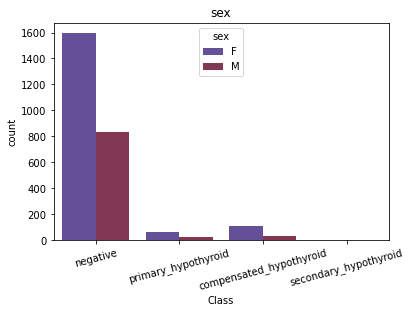

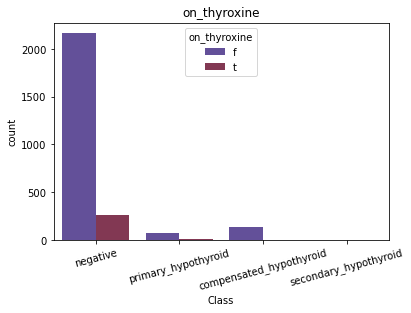

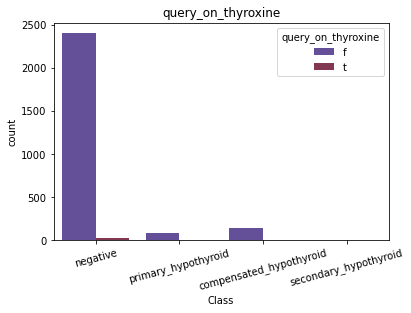

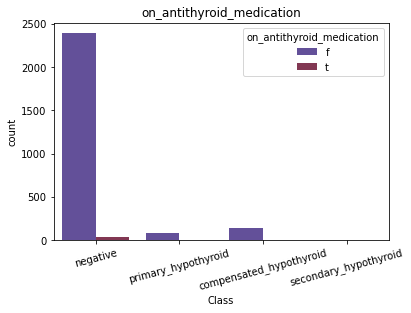

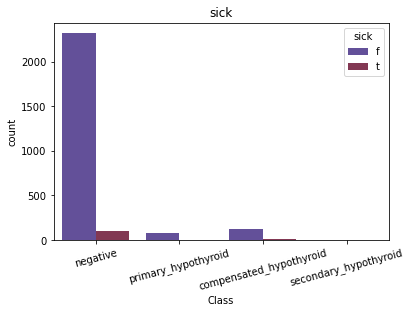

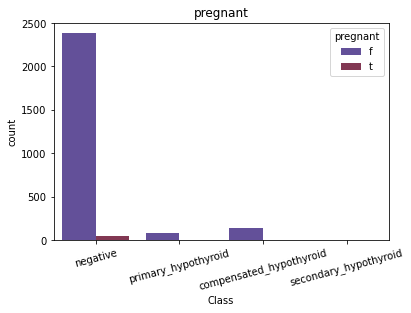

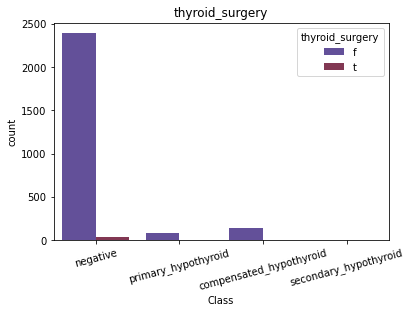

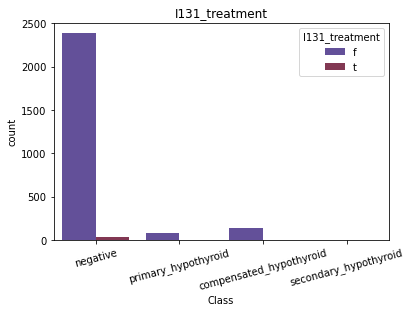

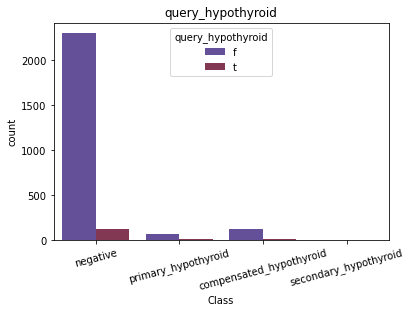

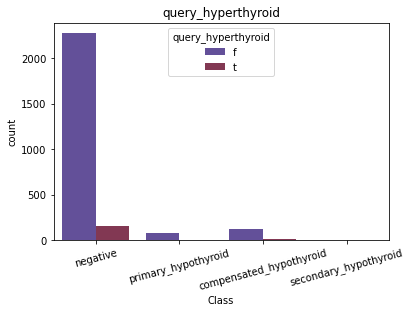

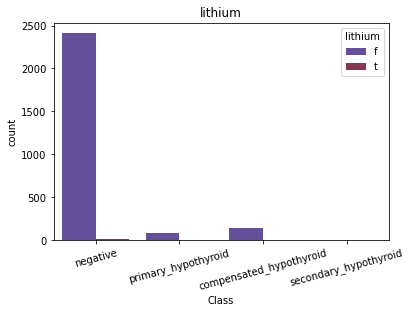

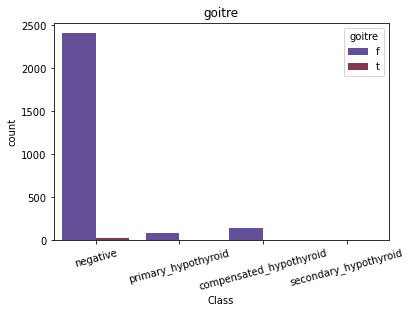

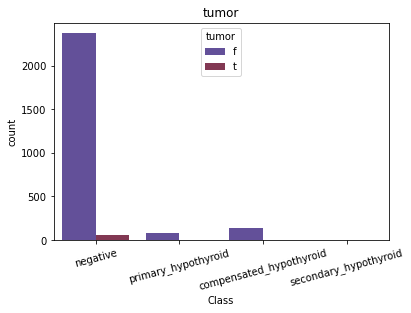

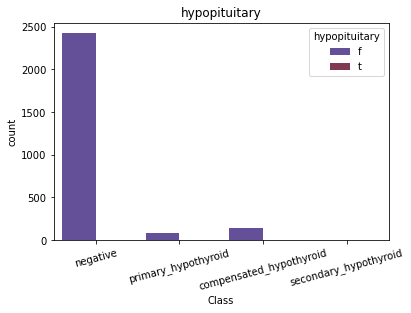

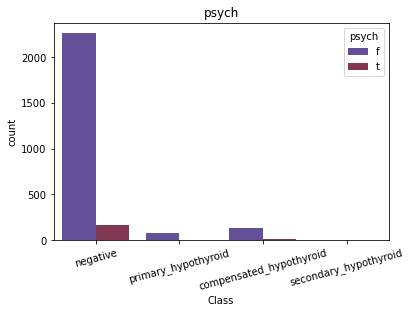

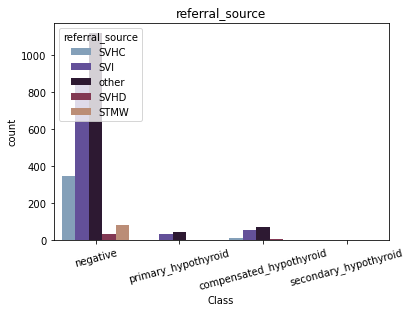

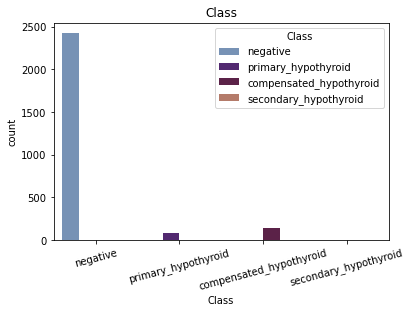

In [37]:
for count_plot in categorical.columns:
    
    ax=sns.countplot(hue=data[count_plot],x=data['Class'],palette='twilight')
    plt.title(count_plot)
    plt.xticks(rotation=15)
    plt.show()

#####  What are the three types of hypothyroidism?
- Primary hypothyroidism is the most common type of hypothyroidism. It occurs when the dysfunction is in the thyroid gland itself.
- Secondary hypothyroidism occurs when there is dysfunction in the pituitary gland. 
- compensated hypothyroidism This most commonly represents clinically silent autoimmune thyroiditis. 
    Whether this condition warrants treatment or simply observation is still debated.
#### Difference between Hypothyroidism and Hyperthyroidism.
- Hypothyroidism, or underactive thyroid, which is when your thyroid gland doesn't make enough thyroid hormone to meet your body's needs.
- Hyperthyroidism, or overactive thyroid, which is when your thyroid gland makes more thyroid hormone than your body needs.

### Symptoms of hypothyroidism (too little thyroid hormone), may include:

* Weight gain
* Fatigue
* Dry skin
* Dry, thinning hair
* Being very sensitive to cold temperatures
* Heavy or irregular menstrual periods or fertility problems
* Slow heart rate
* Depression
### Symptoms of hyperthyroidism (too much thyroid hormone) may include:

* Anxiety, nervousness, irritability
* Weight loss, even though your appetite may increase
* Shaky hands, muscle weakness
* Sweating or being very sensitive to heat
* Arrhythmia (a problem with the rate or rhythm of your heartbeat)
* Frequent bowel movements (poops)
* Goiter (an enlarged thyroid gland)
* Trouble sleeping and fatigue

### Including these symptoms as an feature for further analysis may help to build a model better

* SEX 



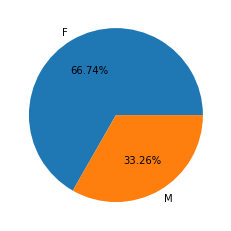

* ON_THYROXINE 



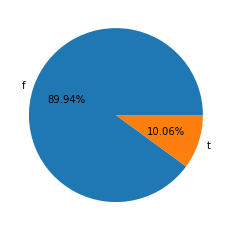

* QUERY_ON_THYROXINE 



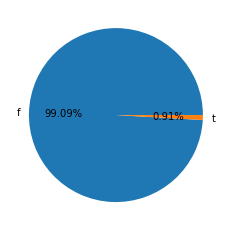

* ON_ANTITHYROID_MEDICATION 



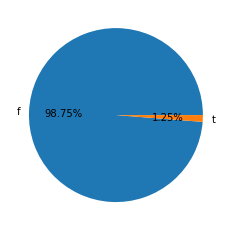

* SICK 



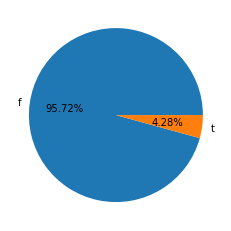

* PREGNANT 



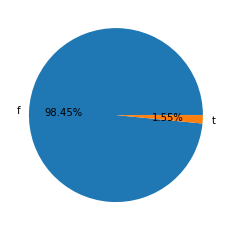

* THYROID_SURGERY 



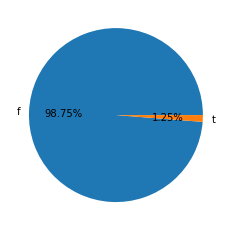

* I131_TREATMENT 



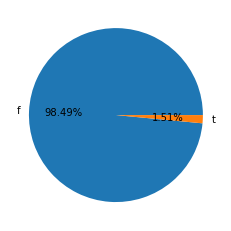

* QUERY_HYPOTHYROID 



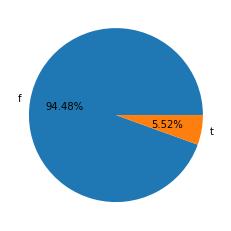

* QUERY_HYPERTHYROID 



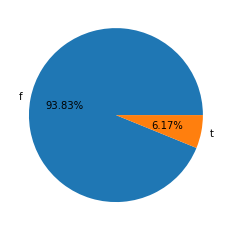

* LITHIUM 



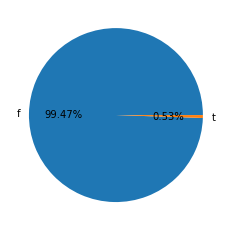

* GOITRE 



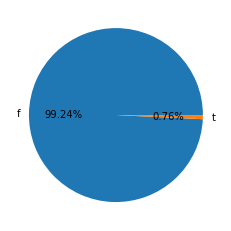

* TUMOR 



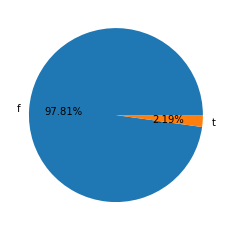

* HYPOPITUITARY 



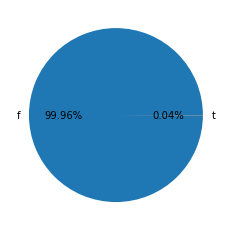

* PSYCH 



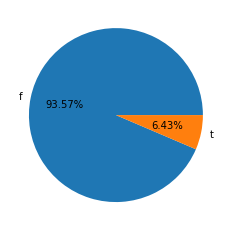

* REFERRAL_SOURCE 



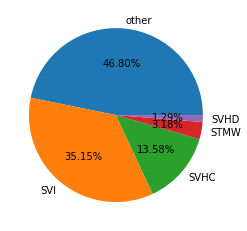

* CLASS 



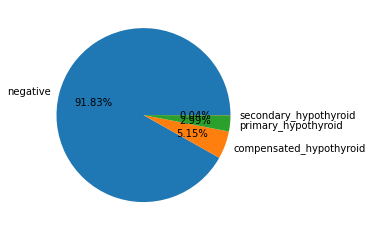

In [38]:
for pie_plot in categorical.columns:
    print("*", pie_plot.upper(),'\n')
    plt.figure(figsize=(6,4))
    plt.pie(data[pie_plot].value_counts().values, labels=data[pie_plot].value_counts().index, autopct='%1.2f%%')
    plt.show()

#####  Insights

* 10.06% of the patient are going through thyroxine treatment.
* ***only 1% of the patient have enquired about the thyroxine treatment.***
* 1.25% of the patients are going through antithyroid medication.
    which is initial treatment in Graves' disease for one to two years to see if the disease resolves
* ***4.28% patients are fallen sick and need more attention.***
* 1.55% patients are pregnant, During pregnancy, it can lead to health problems for the mother and baby.
* 1.25% patients had gone through thyroid surgery.
* (Iodine-131) I-131 radiotherapy is a treatment for hyperthyroidism and thyroid cancer, 5.52% of the patients have eniqured about the hyperthyroidism and 1.51% patients had gone through the treatment. 
* If thyroid function is abnormal at the initial evaluation, lithium can still be given, 0.53% of the patients have taken it. 
* A goiter may be an overall enlargement of the thyroid, or it may be the result of irregular cell growth that forms one or more lumps (nodules) in the thyroid. 0.76% of patients are having this symptom.
* ***thyroid tumor are more likely to grow at least 2 mm per year, patients(2.19%) require most attention towards them.***
* hypopituitarism, lack of the hormone leads to loss of function in the gland or organ that it controls. for example loss of thyroid stimulating hormone(TSH) leads to loss of function in the thyroid gland.
* In Class,
    - 0.04% of patients fall under category of secondary hypothyroid.
    - **2.99% of patients fall under category of primary hypothyroid.**
    - 5.15% of patients fall under category of compensated hypothyroid.




<Figure size 576x432 with 0 Axes>

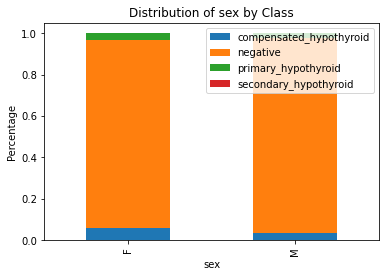

<Figure size 576x432 with 0 Axes>

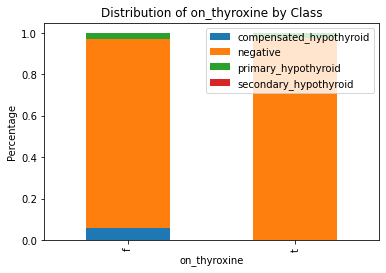

<Figure size 576x432 with 0 Axes>

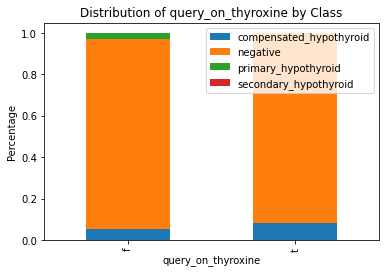

<Figure size 576x432 with 0 Axes>

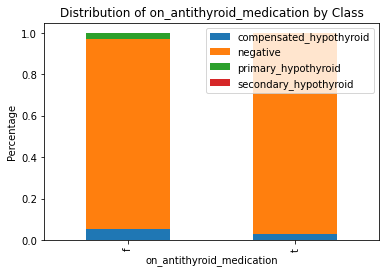

<Figure size 576x432 with 0 Axes>

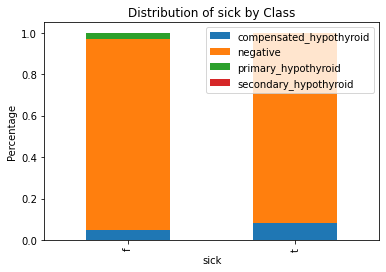

<Figure size 576x432 with 0 Axes>

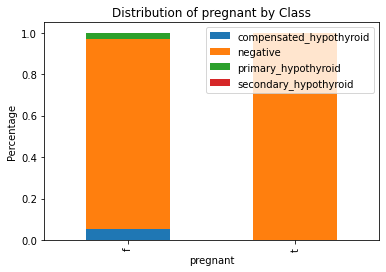

<Figure size 576x432 with 0 Axes>

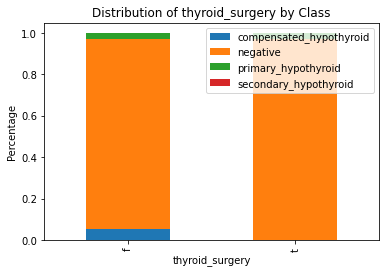

<Figure size 576x432 with 0 Axes>

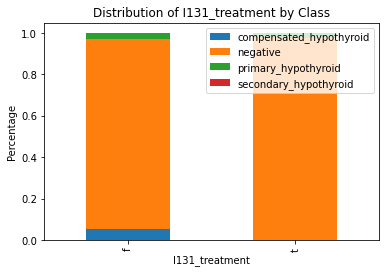

<Figure size 576x432 with 0 Axes>

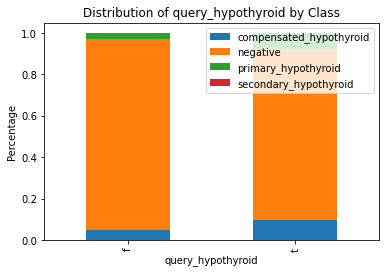

<Figure size 576x432 with 0 Axes>

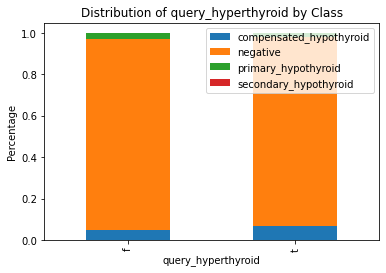

<Figure size 576x432 with 0 Axes>

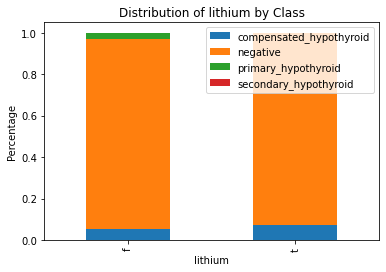

<Figure size 576x432 with 0 Axes>

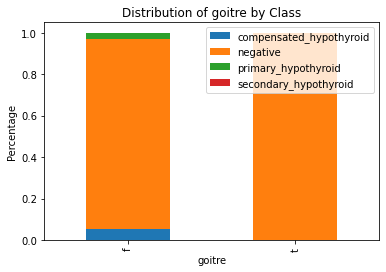

<Figure size 576x432 with 0 Axes>

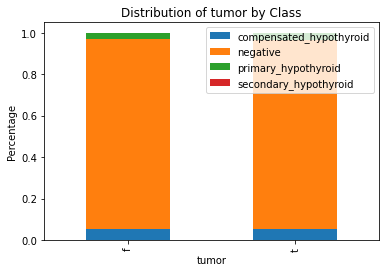

<Figure size 576x432 with 0 Axes>

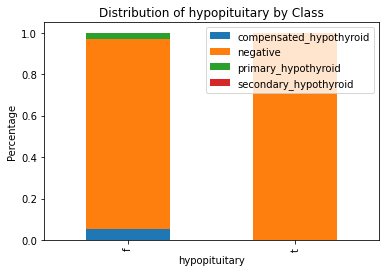

<Figure size 576x432 with 0 Axes>

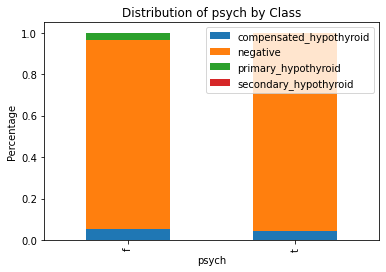

<Figure size 576x432 with 0 Axes>

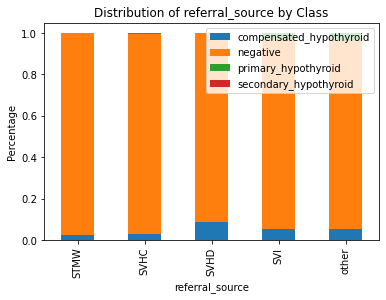

<Figure size 576x432 with 0 Axes>

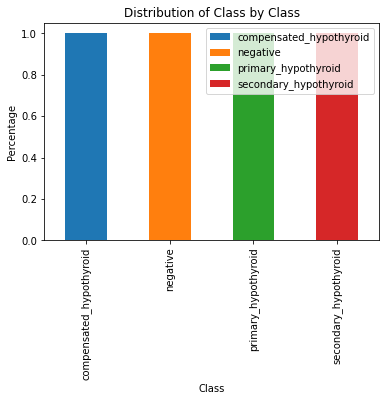

In [39]:
# Create stacked bar charts for each categorical feature and target variable
for feature in categorical:
    plt.figure(figsize=(8, 6))
    crosstab = pd.crosstab(data[feature], data['Class'])
    crosstab_pct = crosstab.apply(lambda x: x/x.sum(), axis=1)
    crosstab_pct.plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.title("Distribution of " + feature + " by Class")
    plt.legend(loc='upper right')
    plt.show()

In [40]:
 data['age'].groupby(data.Class).describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
compensated_hypothyroid,136.0,54.176471,17.065834,7.0,41.5,59.0,68.0,85.0
negative,2427.0,53.077874,20.659393,1.0,37.0,55.0,69.0,455.0
primary_hypothyroid,79.0,51.405063,16.349170,15.0,38.5,52.0,63.0,84.0
secondary_hypothyroid,1.0,46.000000,NaN,46.0,46.0,46.0,46.0,46.0


age:


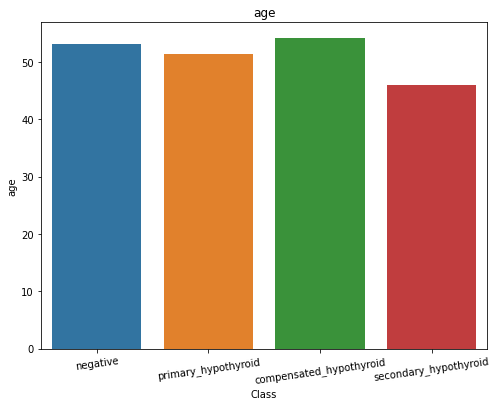

TSH:


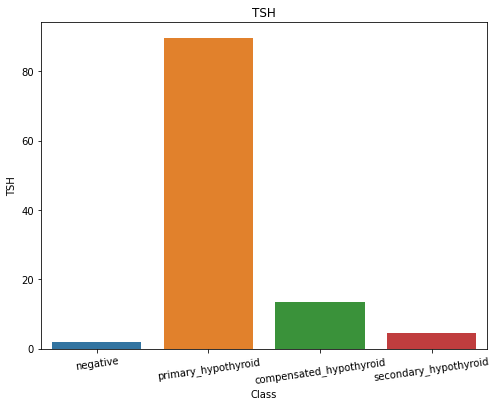

T3:


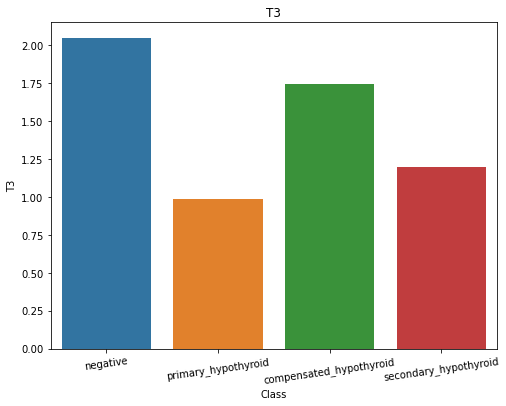

TT4:


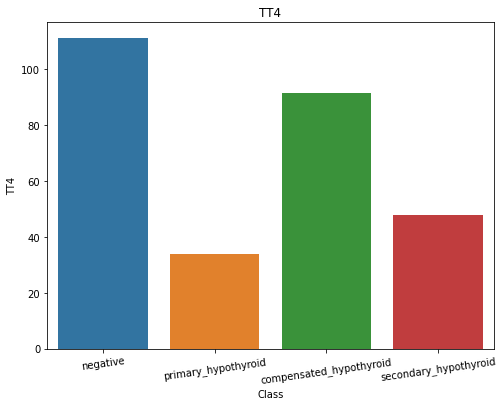

T4U:


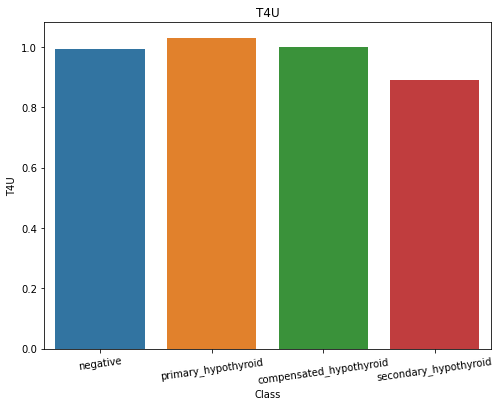

FTI:


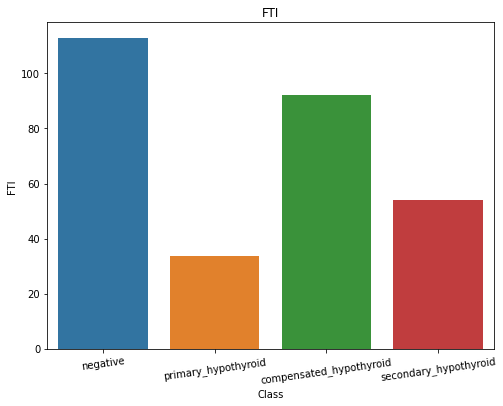

In [41]:
for column in continuous:
    print(column+':')
    plt.figure(figsize=(8,6))
    sns.barplot(y=data[column], x=data.Class, ci=False)
    plt.title(column)
    plt.xticks(rotation=8)
    plt.show()

####  Insights

* **Average age of people getting tested for thyroid is between 50-60.**
* TSH for primary hypothyroid patients are significantly high.
   - **TSH** has been used extensively to establish the presence of **primary hypothyroidism** and more recently to identify hyperthyroid states. **(Indication of TSH patients need more attention).**
   - In primary hypothyroidism, TSH levels are elevated due to the loss of negative inhibition on the anterior pituitary.
   - **TSH levels are elevated, need more attention/everyday treatment.** 
* triiodothyronine (T3) - T3 tests are used for determining the severity of the hyperthyroidism.
* tetraiodothyronine(T4) - more commonly known as thyroxine.
    - Hyperthyroidism, which may be caused by Graves disease or another medical condition that causes your thyroid to make too much T4.
* **The finding of an elevated TSH and low FTI indicates primary hypothyroidism.** 
* **A low TSH and low FT4 or FTI indicates hypothyroidism** due to a problem involving the pituitary gland. 
* A low TSH with an elevated FT4 or FTI is found in individuals who have hyperthyroidism.
* **High TSH + normal T4 = you may have a higher risk of developing an underactive thyroid.(Closer attention required)**

###  * Early detection of thyroid diseases through machine learning models can lead to timely intervention, better patient outcomes, and potentially lower healthcare costs associated with prolonged treatments and complications.

### * Machine learning models can help identify high-risk patients who require immediate attention, enabling healthcare providers to allocate resources effectively and ensure timely diagnosis and treatment.

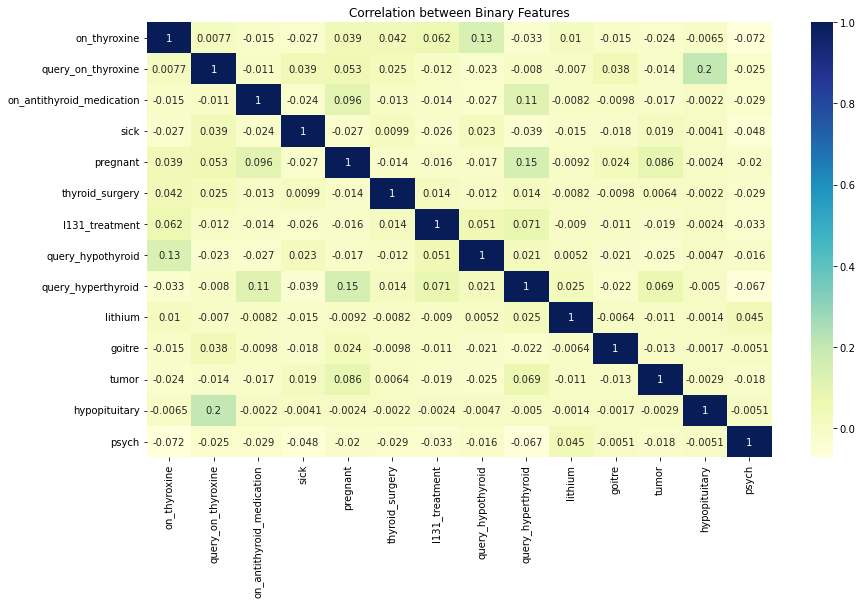

In [42]:
# Create heatmap for binary features
binary_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                   'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                   'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
binary_data = data[binary_features].replace({"f": 0, "t": 1})
corr = binary_data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation between Binary Features")
plt.show()

In [43]:
# We can map the categorical values like below:
data['sex'] = data['sex'].replace({'F':0,'M':1})

In [44]:
data['sex'].value_counts()

0    1764
1     879
Name: sex, dtype: int64

In [45]:
data.Class.value_counts()

negative                   2427
compensated_hypothyroid     136
primary_hypothyroid          79
secondary_hypothyroid         1
Name: Class, dtype: int64

In [46]:
# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].replace({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 

In [47]:
data['referral_source'].unique()

array(['SVHC', 'SVI', 'other', 'SVHD', 'STMW'], dtype=object)

In [48]:
lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [49]:
data.Class.value_counts()

1    2427
0     136
2      79
3       1
Name: Class, dtype: int64

In [50]:
data['Class'] = data['Class'].replace({2:3})

In [51]:
data['Class'] = data['Class'].replace({0:3})

In [52]:
data.Class.value_counts()

1    2427
3     216
Name: Class, dtype: int64

In [53]:
del data['referral_source']

In [54]:
data.describe(include = "all")

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,...,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,53.081725,0.332577,0.100643,0.009081,0.012486,0.042754,0.015513,0.012486,0.015134,0.055240,...,0.007567,0.021945,0.000378,0.064321,5.035978,2.001150,107.858683,0.995650,109.435906,1.163451
std,20.367966,0.471225,0.300913,0.094876,0.111061,0.202341,0.123603,0.111061,0.122110,0.228492,...,0.086676,0.146531,0.019451,0.245370,23.974851,0.823814,35.460437,0.196445,32.472156,0.547995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,1.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.500000,88.000000,0.870000,93.000000,1.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.300000,2.000000,103.000000,0.980000,107.000000,1.000000
75%,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.600000,2.300000,124.000000,1.090000,124.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.120000,395.000000,3.000000


In [55]:
# plt.figure(figsize=(20,15),facecolor='white')
# n=1
# for i in continuous:
#     ax= plt.subplot(3,2,n)
#     sns.distplot(data[i])
#     plt.xlabel(i,fontsize=10)
#     n+=1
# plt.show()

In [56]:
# plt.figure(figsize=(20,15),facecolor='white')
# n=1
# for i in continuous:
#     data[i]+=1
#     data[i] = np.log(data[i])
#     ax= plt.subplot(3,2,n)
#     sns.distplot(data[i])
#     plt.xlabel(i,fontsize =10)
#     n+=1
# plt.show()

In [57]:
data.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.300,2.5,125.0,1.14,109.0,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.720,1.2,61.0,0.87,70.0,1
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.200,0.6,80.0,0.70,115.0,1
8,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.600,2.2,123.0,0.93,132.0,1
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.400,1.6,83.0,0.89,93.0,1
10,84,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.100,2.2,115.0,0.95,121.0,1
12,71,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.030,3.8,171.0,1.13,151.0,1
13,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.800,1.7,97.0,0.91,107.0,1
14,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.300,1.8,109.0,0.91,119.0,1
17,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.500,1.2,117.0,0.96,121.0,1


In [58]:
#thyroid_cleaned_data = data.to_csv('TDD_cleaned_data.csv',index_label=False)

In [59]:
data.shape

(2643, 22)

In [60]:
# data = data.reset_index()


#  Original dataset 

In [61]:
x = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']

In [62]:
# from sklearn.model_selection import RepeatedStratifiedKFold

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [64]:
x_sm,y_sm =smote.fit_resample(x,y)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.3, random_state=123, shuffle=True, stratify=y_sm)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [67]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [68]:
y_train.value_counts(normalize=True)

Class
3        0.500147
1        0.499853
dtype: float64

# The classification algorithm is based on supervised learning methodology where the labeled data is used for learning.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
models = {
    LogisticRegression(random_state=1, solver='lbfgs'):'Logistic Regression',
    SVC(probability=True,C= 10, degree= 2, kernel= 'linear'):"Support Vector Machine",
    DecisionTreeClassifier(max_depth= 6,random_state=42):"Decision Tree Classifier",
    RandomForestClassifier(bootstrap=True,max_depth= 10, n_estimators= 500,random_state=42):'Random Forest', 
    KNeighborsClassifier(n_neighbors=5): "KNN",
#     AdaBoostClassifier(n_estimators=100, random_state=0):"AdaBoost"
    }
for m in models.keys():
    m.fit(x_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(x_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  96.84282772820865 %
Accuracy Score for Support Vector Machine is :  99.17638984214139 %
Accuracy Score for Decision Tree Classifier is :  99.7254632807138 %
Accuracy Score for Random Forest is :  99.8627316403569 %
Accuracy Score for KNN is :  89.15579958819492 %


######  The traditional AdaBoost algorithm is basically a binary classifier and it has limitations when applied to multi-class data problems even though its multi-class versions are available. 

In [71]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {type(model).__name__}:")
    print(cm)

Confusion matrix for LogisticRegression:
[[714  15]
 [ 31 697]]
Confusion matrix for SVC:
[[719  10]
 [  2 726]]
Confusion matrix for DecisionTreeClassifier:
[[727   2]
 [  2 726]]
Confusion matrix for RandomForestClassifier:
[[727   2]
 [  0 728]]
Confusion matrix for KNeighborsClassifier:
[[610 119]
 [ 39 689]]


In [72]:
for model, name in models.items():
    y_pred = model.predict(x_test)
    print('\n\n',f"Results for {name}:",'\n')
    print(classification_report(y_test, y_pred))



 Results for Logistic Regression: 

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       729
           3       0.98      0.96      0.97       728

    accuracy                           0.97      1457
   macro avg       0.97      0.97      0.97      1457
weighted avg       0.97      0.97      0.97      1457



 Results for Support Vector Machine: 

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       729
           3       0.99      1.00      0.99       728

    accuracy                           0.99      1457
   macro avg       0.99      0.99      0.99      1457
weighted avg       0.99      0.99      0.99      1457



 Results for Decision Tree Classifier: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       729
           3       1.00      1.00      1.00       728

    accuracy                           1.00      1457
   mac

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
# Define the parameter grids for the decision tree and random forest
dt_param_grid = {'max_depth': [2, 4, 6, 8, 10]}
rf_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [2, 4, 6, 8, 10],
                 'bootstrap':[True], 'max_features':['auto','log2']}

# Define the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define the grid search with cross-validation for the decision tree
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(x, y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})

In [75]:
# Define the grid search with cross-validation for the random forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [76]:

# Print the best parameters and mean cross-validation score for each model
print("Decision Tree:")
print("Best Parameters:", dt_grid_search.best_params_)
print("Mean Cross-Validation Score:", np.round(dt_grid_search.best_score_, 3))
print()
print("Random Forest:")
print("Best Parameters:", rf_grid_search.best_params_)
print("Mean Cross-Validation Score:", np.round(rf_grid_search.best_score_, 3))

Decision Tree:
Best Parameters: {'max_depth': 4}
Mean Cross-Validation Score: 0.998

Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Mean Cross-Validation Score: 0.995


In [77]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report


In [78]:
# Define models and corresponding parameter grids for hyperparameter tuning
models = {
    "SVM": (SVC(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf", "poly"],'degree': [2, 3, 4]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7], "p": [1, 2, 3], 'weights': ['uniform', 'distance']}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [5, 10, None]}),
}

# Perform grid search for each model and print best parameters and corresponding score
for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"{name} best parameters: ", grid.best_params_)
    print(f"{name} best score: ", grid.best_score_)
    
    # Predict on testing set using best model
    y_pred = grid.predict(X_test)
    
    # Print classification report
    print(f"{name} classification report:")
    print(classification_report(y_test, y_pred))

SVM best parameters:  {'C': 10, 'degree': 2, 'kernel': 'linear'}
SVM best score:  0.9867543099714112
SVM classification report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       729
           3       0.99      1.00      0.99       728

    accuracy                           0.99      1457
   macro avg       0.99      0.99      0.99      1457
weighted avg       0.99      0.99      0.99      1457

Random Forest best parameters:  {'max_depth': None, 'n_estimators': 50}
Random Forest best score:  0.9979390106558087
Random Forest classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       729
           3       1.00      1.00      1.00       728

    accuracy                           1.00      1457
   macro avg       1.00      1.00      1.00      1457
weighted avg       1.00      1.00      1.00      1457

KNN best parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'di

In the KNN model, the hyperparameter p stands for the power parameter for the Minkowski distance metric. The Minkowski distance is a generalization of Euclidean distance and Manhattan distance.

When p equals 1, the distance metric used is Manhattan distance, also known as L1 distance. When p equals 2, the distance metric used is Euclidean distance, also known as L2 distance. When p is greater than 2, the distance metric used is a generalized Minkowski distance.

In the given code, p is a hyperparameter and the GridSearchCV function will try different values of p to find the best value that results in the highest model performance. The values of p specified in [1, 2, 3] correspond to Manhattan distance, Euclidean distance, and a generalized Minkowski distance, respectively.

In [79]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform grid search cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic regression model with best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

# Predict on test set
y_pred = best_logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9910775566231984
Precision: 0.9931129476584022
Recall: 0.9890260631001372
F1-score: 0.9910652920962199


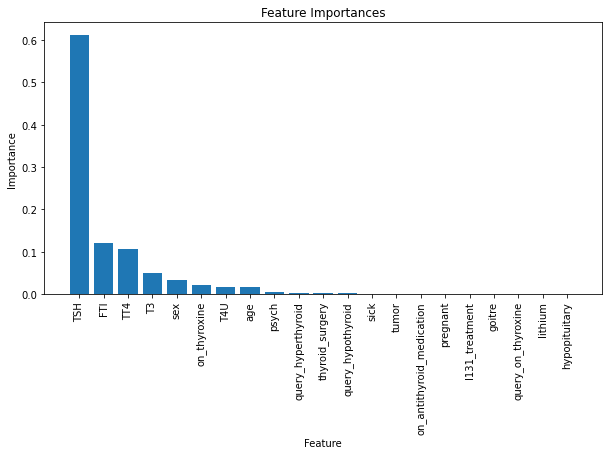

In [81]:
# Create and train a Random Forest classifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)
# Get feature importances
importances = rfmodel.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Get feature names from the column names of the input dataset
feature_names = x.columns

# Plot feature importances
plt.figure(figsize=(10,5))
plt.bar(range(x.shape[1]), importances[sorted_idx])
plt.xticks(range(x.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')

    
plt.show()

## Future Scope:

* Reducing the input variable to your model by using only relevant data and eliminating noise in data.
* The goal of feature selection is to improve the performance of the model by reducing the number of input features while maintaining or even increasing the accuracy of the model.



## -END-